# corrosion module example
* Input
Raw data
+ moisture

+ temperature

+ corrosion state determined by chloride and carbonation from other modules

* Output
+ icorr and corrosion rate

+ accumulated section loss with time


In [10]:
%matplotlib inline
import numpy as np
from corrosion import CorrosionModel, SectionLossModel
import math_helper as mh
import matplotlib.pyplot as plt

In [11]:

class Param: pass
raw_pars = Param()

# geometry and age
raw_pars.d = 0.04  # cover depth [m]
raw_pars.t = 3650  # age[day]

# concrete composition
raw_pars.cement_type = 'Type I'
raw_pars.concrete_density = 2400 #kg/m^3
raw_pars.a_c = 2        # aggregate(fine and coarse)/cement ratio
raw_pars.w_c = 0.5      # water/cement ratio
raw_pars.rho_c= 3.1e3   # density of cement particle [kg/m^3]
raw_pars.rho_a= 2600.   # density of aggregate particle(fine and coarse) range 2400-2900 [kg/m^3]


# concrete condition
raw_pars.epsilon = 0.25     # porosity of concrete
raw_pars.theta_water = 0.12 # volumetric water content
raw_pars.T = 273.15+25      # temperature [K]



In [12]:
# initialize and run model
model_corr = CorrosionModel(raw_pars)
model_corr.run()

# result 
model_corr.icorr

# icorr
print(f"icorr [A/m^2]: {model_corr.icorr.mean()}")
# section loss
model_corr.x_loss_rate
print(f"section loss rate [mm/year]: {model_corr.x_loss_rate.mean()}")

icorr [A/m^2]: 0.006407338781248256
section loss rate [mm/year]: 0.007420476449759697


* Accumulated section loss with the increasing probability of active corrosion

Text(0, 0.5, 'probability of active corrosion')

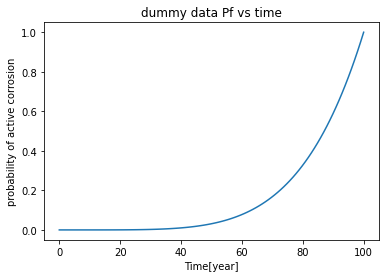

In [13]:
# time steps
t_lis = np.linspace(0, 365*100 , 100)  

# Given probability of active corrosion with time, and the section loss  (determined by membrane, carbonation, chloride module)
# dummy data used for this example
pf_lis = np.linspace(0,1,len(t_lis))**5
plt.plot(t_lis / 365, pf_lis)
plt.title('dummy data Pf vs time')
plt.xlabel('Time[year]')
plt.ylabel('probability of active corrosion')


Pf(g = R-S < 0) from various methods
    sample count: 0.0
    g integral: -8.940780559194072e-06
    R S integral: 0.0
    beta_factor: 41.81683117869038
0.13022243234345696 0.0


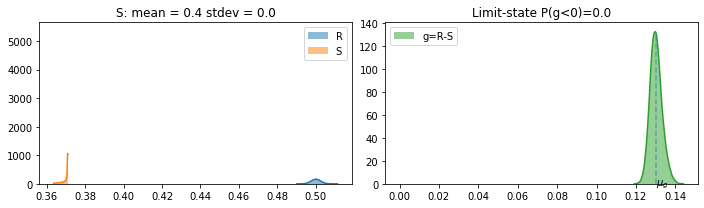

In [14]:
# prepare Param object for section loss object
pars_sl = Param()
pars_sl.x_loss_rate = model_corr.x_loss_rate.mean()     # mm/year mean section loss rate from the corrosion model
pars_sl.p_active_t_curve = (pf_lis, t_lis)              # use dummy data for this example

# critical section loss from the external structural analysis
pars_sl.x_loss_limit_mean = 0.5         # mm
pars_sl.x_loss_limit_std = 0.5 * 0.005  # mm

# initialize section loss model object
model_sl = SectionLossModel(pars_sl)

# run model for one time step, 80 year
model_sl.run(t_end = 50)
model_sl.postproc(plot=True)


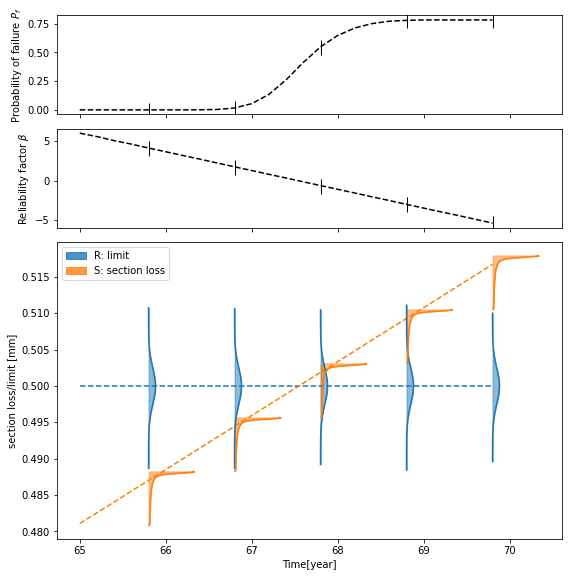

In [15]:
# run the model through a list of year steps
pf_sl, beta_sl = model_sl.section_loss_with_year(year_lis=np.arange(65,70,0.2), amplify=5e-4)
